In [1]:
from causalinference import CausalModel
from causalinference.utils import random_data
Y, D, X = random_data()
causal = CausalModel(Y, D, X)

In [2]:
Y

array([-0.97459952,  6.66150061, -2.79006464, ...,  4.50108172,
        2.07503773,  2.86091867])

In [3]:
D

array([0, 1, 0, ..., 1, 0, 1])

In [4]:
X

array([[-0.18907949, -0.17786736,  0.16315862],
       [-0.50528589,  0.68275237,  0.94630401],
       [-2.3282749 , -0.49317444, -0.10932939],
       ...,
       [ 0.14638629,  0.56637474,  0.75089387],
       [ 2.04292117,  1.13258797, -1.90044037],
       [-0.30677503,  0.26815325, -0.13143382]])

In [5]:
causal.summary_stats

{'N': 5000, 'K': 3, 'N_c': 2548, 'N_t': 2452, 'Y_c_mean': -1.0214288944843897, 'Y_t_mean': 4.935426794388906, 'Y_c_sd': 1.7041992012668283, 'Y_t_sd': 3.064268744751718, 'rdiff': 5.956855688873296, 'X_c_mean': array([-0.33485672, -0.3494101 , -0.32957798]), 'X_t_mean': array([0.32969554, 0.33389802, 0.31317995]), 'X_c_sd': array([0.93376859, 0.96538064, 0.95161864]), 'X_t_sd': array([0.92906769, 0.94870668, 0.94015047]), 'ndiff': array([0.71348207, 0.71395091, 0.67951858])}

In [6]:
len(Y)

5000

CausalGraphicalModels

In [7]:
from causalgraphicalmodels import CausalGraphicalModel

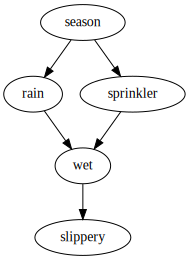

In [8]:
sprinkler = CausalGraphicalModel(
    nodes=["season", "rain", "sprinkler", "wet", "slippery"],
    edges=[
        ("season", "rain"), 
        ("season", "sprinkler"), 
        ("rain", "wet"),
        ("sprinkler", "wet"), 
        ("wet", "slippery")
    ]
)

# draw return a graphviz `dot` object, which jupyter can render
sprinkler.draw()

In [9]:
from graphviz import Digraph

# Create a new directed graph
dot = Digraph(comment='The Round Table')

# Add nodes
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

# Add edges
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

# Render the graph (output format can be 'pdf', 'png', etc.)
dot.render('round-table.gv', view=True)

'round-table.gv.pdf'

In [10]:
sprinkler.get_distribution()

'P(season)P(rain|season)P(sprinkler|season)P(wet|rain,sprinkler)P(slippery|wet)'

/opt/Adobe/Reader9/Reader/intellinux/bin/acroread: error while loading shared libraries: libgdk_pixbuf_xlib-2.0.so.0: cannot open shared object file: No such file or directory


In [11]:
# check for d-seperation of two nodes
sprinkler.is_d_separated("slippery", "season", {"wet"})

True

In [12]:
# get all the conditional independence relationships implied by a CGM
sprinkler.get_all_independence_relationships()

[('slippery', 'rain', {'wet'}),
 ('slippery', 'rain', {'sprinkler', 'wet'}),
 ('slippery', 'rain', {'season', 'wet'}),
 ('slippery', 'rain', {'season', 'sprinkler', 'wet'}),
 ('slippery', 'season', {'wet'}),
 ('slippery', 'season', {'rain', 'sprinkler'}),
 ('slippery', 'season', {'sprinkler', 'wet'}),
 ('slippery', 'season', {'rain', 'wet'}),
 ('slippery', 'season', {'rain', 'sprinkler', 'wet'}),
 ('slippery', 'sprinkler', {'wet'}),
 ('slippery', 'sprinkler', {'season', 'wet'}),
 ('slippery', 'sprinkler', {'rain', 'wet'}),
 ('slippery', 'sprinkler', {'rain', 'season', 'wet'}),
 ('rain', 'sprinkler', {'season'}),
 ('wet', 'season', {'rain', 'sprinkler'}),
 ('wet', 'season', {'rain', 'slippery', 'sprinkler'})]

In [13]:
# check backdoor adjustment set
sprinkler.is_valid_backdoor_adjustment_set("rain", "slippery", {"wet"})

False

In [14]:
# get all backdoor adjustment sets
sprinkler.get_all_backdoor_adjustment_sets("rain", "slippery")

frozenset({frozenset({'sprinkler'}),
           frozenset({'season'}),
           frozenset({'season', 'sprinkler'})})

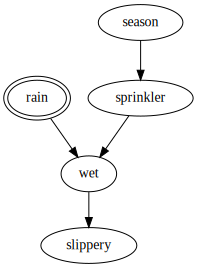

In [15]:
# get the graph created by intervening on node "rain"
do_sprinkler = sprinkler.do("rain")

do_sprinkler.draw()

Latent Variables

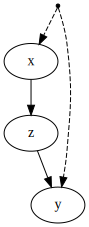

In [16]:
dag_with_latent_variables = CausalGraphicalModel(
    nodes=["x", "y", "z"],
    edges=[
        ("x", "z"),
        ("z", "y"), 
    ],
    latent_edges=[
        ("x", "y")
    ]
)

dag_with_latent_variables.draw()

In [17]:
# here there are no observed backdoor adjustment sets
dag_with_latent_variables.get_all_backdoor_adjustment_sets("x", "y")

frozenset()

In [18]:
# but there is a frontdoor adjustment set
dag_with_latent_variables.get_all_frontdoor_adjustment_sets("x", "y")


frozenset({frozenset({'z'})})

StructuralCausalModels

In [19]:
from causalgraphicalmodels import StructuralCausalModel
import numpy as np

scm = StructuralCausalModel({
    "x1": lambda     n_samples: np.random.binomial(n=1,p=0.7,size=n_samples),
    "x2": lambda x1, n_samples: np.random.normal(loc=x1, scale=0.1),
    "x3": lambda x2, n_samples: x2 ** 2,
})

In [20]:
ds = scm.sample(n_samples=100)

ds.head()

,x1,x2,x3
0,1,0.951558,0.905463
1,1,1.091798,1.192024
2,0,0.151725,0.023021
3,1,0.922704,0.851383
4,1,1.080743,1.168005


<Axes: xlabel='x2', ylabel='x3'>

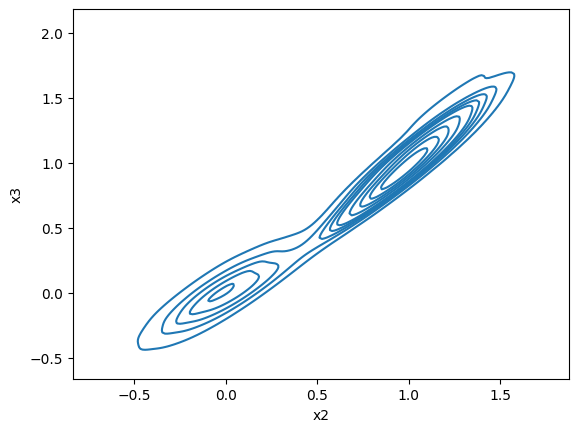

In [26]:
# and visualise the samples
import seaborn as sns

%matplotlib inline

sns.kdeplot(
    data=ds,
    x='x2',
    y='x3',
)

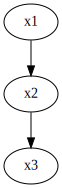

In [27]:
scm.cgm.draw()

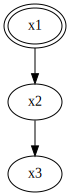

In [28]:
scm_do = scm.do("x1")

scm_do.cgm.draw()

In [29]:
scm_do.sample(n_samples=5, set_values={"x1": np.arange(5)})

,x1,x2,x3
0,0,0.044495,0.001980
1,1,0.936395,0.876836
2,2,2.028205,4.113617
3,3,3.023118,9.139240
4,4,3.897327,15.189159
